In [1]:
# include("../../src/models/ucmp/ucmp_model.jl")
# include("../../src/interface/solve_ucmp.jl")
using ExaAdmm

function test_ucmp(ucmp_model::ExaAdmm.UCMPModel)
    T = ucmp_model.mpmodel.len_horizon
    ngen = ucmp_model.mpmodel.models[1].grid_data.ngen
    nbus = ucmp_model.mpmodel.models[1].grid_data.nbus
    nline = ucmp_model.mpmodel.models[1].grid_data.nline

    # Print vars
    println("ucmp_model.mpmodel.len_horizon: ", ucmp_model.mpmodel.len_horizon)
    println("ucmp_model.mpmodel.models[1].grid_data.ngen: ", ucmp_model.mpmodel.models[1].grid_data.ngen)
    println("ucmp_model.mpmodel.models[1].grid_data.nbus: ", ucmp_model.mpmodel.models[1].grid_data.nbus)
    println("ucmp_model.mpmodel.models[1].grid_data.nline: ", ucmp_model.mpmodel.models[1].grid_data.nline)
    println("ucmp_model.mpmodel.models[1].solution.u_curr: ", ucmp_model.mpmodel.models[1].solution.u_curr)
end

# Functions for collecting solutions
function collect_ucmpmodel_solution(ucmpmodel::ExaAdmm.UCMPModel)
    T = ucmpmodel.mpmodel.len_horizon
    ngen = ucmpmodel.mpmodel.models[1].grid_data.ngen
    nbus = ucmpmodel.mpmodel.models[1].grid_data.nbus
    nline = ucmpmodel.mpmodel.models[1].grid_data.nline
    pg = zeros(T, ngen)
    qg = zeros(T, ngen)
    U = zeros(T, ngen)
    for t in 1:T
        for i in 1:ngen
            pg[t,i] = ucmpmodel.mpmodel.models[t].solution.u_curr[2*i-1]
            qg[t,i] = ucmpmodel.mpmodel.models[t].solution.u_curr[2*i]
            U[t,i] =  ucmpmodel.uc_solution.u_curr[3*i-1]
        end
    end
    return pg, qg, U
end


# test_ucmp
case = "case9"
case_file = "/home/tom/master_thesis/pinn-opf/Input_Data/case9/exaadmm/$(case).m"
load_file = "/home/tom/master_thesis/pinn-opf/Input_Data/case9/exaadmm/$(case)_0"
gen_prefix = "/home/tom/master_thesis/pinn-opf/Input_Data/case9/exaadmm/$(case)_gen"
env, mod = ExaAdmm.solve_ucmp(case_file, load_file, gen_prefix; ramp_ratio=0.03, rho_pq=1e3, rho_va=1e4, rho_uc=1e4, outer_iterlim=10, inner_iterlim=10, start_period=1, end_period=24, scale=1e-4, tight_factor=0.99, use_gpu=false, warm_start=false)

test_ucmp(mod)
pg, qg, U = collect_ucmpmodel_solution(mod)
println("pg: ", pg)
println("qg: ", qg)


 ** Statistics of case9
  # buses     :     9
  # generators:     3 (    3 active)
  # branches  :     9 (    9 active)
  # gencost   :     3 (    3 active)
   Outer     Inner      Objval      AugLag     PrimRes  EpsPrimRes     DualRes       ||z||   ||Ax+By||    OuterTol        Beta
       0         0   2.604e+04   4.632e+04   4.959e+00   0.000e+00   0.000e+00   0.000e+00   4.959e+00   1.929e-03   1.000e+03
       1         1   2.907e+04   2.915e+04   6.644e-01   3.857e-03   6.692e-01   6.692e-01   1.331e+00   1.929e-03   1.000e+03
       1         2   2.610e+04   2.611e+04   2.436e-01   3.857e-03   2.452e-01   7.089e-01   8.221e-01   1.929e-03   1.000e+03
       1         3   2.610e+04   2.612e+04   1.763e-01   3.857e-03   1.766e-01   7.089e-01   7.513e-01   1.929e-03   1.000e+03
       1         4   2.610e+04   2.615e+04   1.181e-01   3.857e-03   1.182e-01   7.067e-01   7.240e-01   1.929e-03   1.000e+03
       1         5   2.609e+04   2.617e+04   8.146e-02   3.857e-03   8.154e-02   

In [2]:
u_curr = mod.uc_solution.u_curr

3×72 Matrix{Float64}:
 0.00420403  0.0  0.0  0.0073774   0.0  …  0.00174423  0.0  2.5034e-5
 0.0051817   0.0  0.0  0.00879918  0.0     0.00213316  0.0  3.2434e-5
 0.00457221  0.0  0.0  0.00788813  0.0     0.00189956  0.0  2.89169e-5

size(pg): (24, 3)


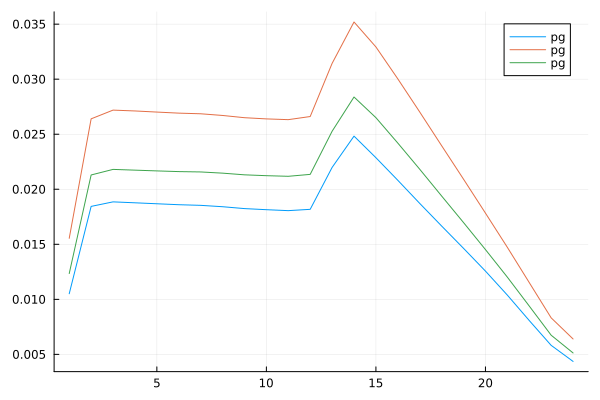

In [3]:
# shape of pg
println("size(pg): ", size(pg))
#plot pg and qg
using Plots
plot(pg, label="pg")

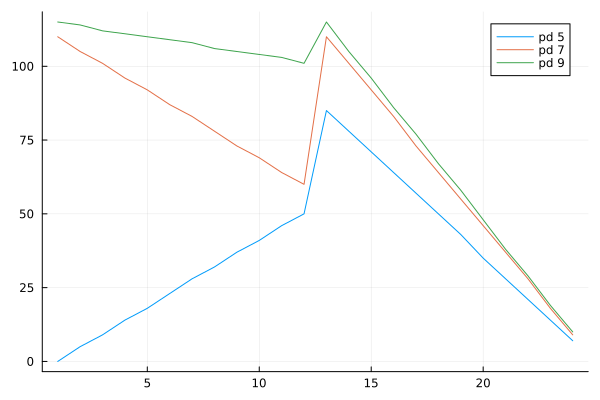

In [4]:
#input pd csv

using CSV, DataFrames
pd_file = "$(load_file).Pd"
#read pd csv into matrix
pd = CSV.read(pd_file, DataFrame, header=false)
p = plot()

# plot each row as a separate line
for i in 1:size(pd, 1)
    # plot if not all zeros 
    if sum(pd[i, :]) > 0
        plot!(p, Array(pd[i, :]), label="pd $i")
    end
end
display(p)

In [5]:
using ExaAdmm

# Functions for collecting solutions
function collect_ucmpmodel_solution(ucmpmodel::ExaAdmm.UCMPModel)
    T = ucmpmodel.mpmodel.len_horizon
    ngen = ucmpmodel.mpmodel.models[1].grid_data.ngen
    nbus = ucmpmodel.mpmodel.models[1].grid_data.nbus
    nline = ucmpmodel.mpmodel.models[1].grid_data.nline

    pg = zeros(T, ngen)
    qg = zeros(T, ngen)
    
    for t in 1:T
        for i in 1:ngen
            pg[t,i] = ucmpmodel.mpmodel.models[t].solution.u_curr[2*i-1]
            qg[t,i] = ucmpmodel.mpmodel.models[t].solution.u_curr[2*i]
        end
    end
    return pg, qg
end


# test_ucmp
data_dir = "/home/tom/master_thesis/pinn-opf/Input_Data/case9/exaadmm/"
case = "case9"
case_file = "/home/tom/master_thesis/pinn-opf/Input_Data/case9/exaadmm/$(case).m"
load_file = "/home/tom/master_thesis/pinn-opf/Input_Data/case9/exaadmm/$(case)_0"
gen_prefix = "/home/tom/master_thesis/pinn-opf/Input_Data/case9/exaadmm/$(case)_gen"
env, mod = ExaAdmm.solve_ucmp(case_file, load_file, gen_prefix; ramp_ratio=0.03, rho_pq=1e3, rho_va=1e4, rho_uc=1e4, outer_iterlim=10, inner_iterlim=10, start_period=1, end_period=4, scale=1e-4, tight_factor=0.99, use_gpu=false, warm_start=false)

pg, qg = collect_ucmpmodel_solution(mod)



 ** Statistics of case9
  # buses     :     9
  # generators:     3 (    3 active)
  # branches  :     9 (    9 active)
  # gencost   :     3 (    3 active)
   Outer     Inner      Objval      AugLag     PrimRes  EpsPrimRes     DualRes       ||z||   ||Ax+By||    OuterTol        Beta
       0         0   4.340e+03   7.720e+03   4.959e+00   0.000e+00   0.000e+00   0.000e+00   4.959e+00   1.929e-03   1.000e+03
       1         1   4.864e+03   4.874e+03   5.927e-01   3.857e-03   5.994e-01   5.994e-01   1.189e+00   1.929e-03   1.000e+03
       1         2   4.351e+03   4.352e+03   1.899e-01   3.857e-03   1.918e-01   6.203e-01   6.944e-01   1.929e-03   1.000e+03
       1         3   4.350e+03   4.354e+03   1.553e-01   3.857e-03   1.557e-01   5.876e-01   5.949e-01   1.929e-03   1.000e+03
       1         4   4.350e+03   4.359e+03   1.129e-01   3.857e-03   1.131e-01   5.603e-01   5.551e-01   1.929e-03   1.000e+03
       1         5   4.349e+03   4.363e+03   8.067e-02   3.857e-03   8.080e-02   

([0.010509827676381062 0.015554448705433628 0.012348752284147042; 0.018468339891114547 0.02647064892223662 0.021332519665422555; 0.0192986626367272 0.02800562894363337 0.022323969088341517; 0.02582564648101071 0.03629865183833252 0.029092231754634542], [-0.01261160384342464 -0.015554433897452459 -0.013720759737645109; -0.022161150832137454 -0.02647018820757742 -0.023702177024511984; -0.02315747549196743 -0.02800512671025657 -0.024803735549277364; -0.030989637577103612 -0.03629869595735144 -0.03232360012396747])

In [6]:
# convert pg, qg to DataFrame
using DataFrames
pg_df = DataFrame(pg, :auto)
qg_df = DataFrame(qg, :auto) 

Row,x1,x2,x3
,Float64,Float64,Float64
1,-0.0126116,-0.0155544,-0.0137208
2,-0.0221612,-0.0264702,-0.0237022
3,-0.0231575,-0.0280051,-0.0248037
4,-0.0309896,-0.0362987,-0.0323236


In [7]:

# Save pg, qg to csv
using CSV
CSV.write("pg.csv", pg_df)
CSV.write("qg.csv", qg_df)

"qg.csv"

In [8]:
test_ucmp(mod)

ucmp_model.mpmodel.len_horizon: 4
ucmp_model.mpmodel.models[1].grid_data.ngen: 3
ucmp_model.mpmodel.models[1].grid_data.nbus: 9
ucmp_model.mpmodel.models[1].grid_data.nline: 9
ucmp_model.mpmodel.models[1].solution.u_curr: [0.010509827676381062, -0.01261160384342464, 0.015554448705433628, -0.015554433897452459, 0.012348752284147042, -0.013720759737645109, 0.18719878780711893, -0.0169768439242155, -0.18719878780711893, 0.019017631123602996, 0.9972132936021221, 0.9992865753648764, 0.0, -0.010801769482343362, -0.18018517327069364, -0.1288537616552326, 0.1807799940754378, -0.027023350553161338, 0.9991284506100367, 1.0147467702232604, -0.012213627690920143, 0.003407463488183459, 0.04492640306587861, -0.2785505835122588, -0.044487605483075315, -0.08809493036660343, 1.014593718950487, 1.0443907575359963, 0.00239289416361756, -0.008699479448996324, 0.18611274552250304, -0.020499729401478817, -0.18611274552250304, 0.022471427776970643, 1.0419494850193514, 1.0444675948300084, 0.001197131449927427

In [9]:
mod.uc_solution.u_curr

3×12 Matrix{Float64}:
 0.00420388  0.0  0.0  0.0073872   0.0  …  0.0103301  0.0  0.000102674
 0.00518478  0.0  0.0  0.00882347  0.0     0.0120995  0.0  0.000117914
 0.00457357  0.0  0.0  0.00790082  0.0     0.0107747  0.0  0.000107172

In [10]:
# cols naming scheme: v0, w0, y0, v1, w1, y1, ...
cols = []
for i in 1:size(mod.uc_solution.u_curr, 2) ÷ 3
    push!(cols, "v$i")
    push!(cols, "w$i")
    push!(cols, "y$i")
end

In [11]:
for i=1:mod.mpmodel.len_horizon
    # println("on: ",mod.uc_solution.u_curr[:, 3*i-1] )
    # println("off: ",mod.uc_solution.u_curr[:, 3*i] )
    println("ramp: ",mod.uc_solution.u_curr[:, 3*i-2] )
end

ramp: [0.004203878269981971, 0.005184782517028904, 0.004573565446176327]
ramp: [0.007387203943845301, 0.008823466145763707, 0.007900821437737644]
ramp: [0.007719326417367597, 0.00933512087837227, 0.008268019029880948]
ramp: [0.010330079725097759, 0.012099548805618173, 0.010774744330486941]


In [12]:
uc_df = DataFrame(mod.uc_solution.u_curr, cols)
vc_df = DataFrame(mod.uc_solution.v_curr, :auto)
lc_df = DataFrame(mod.uc_solution.l_curr, :auto)
rho_df = DataFrame(mod.uc_solution.rho, :auto)
rd_df = DataFrame(mod.uc_solution.rd, :auto)
rp_df = DataFrame(mod.uc_solution.rp, :auto)
zc_df = DataFrame(mod.uc_solution.z_curr, :auto)
sc_df = DataFrame(mod.uc_solution.s_curr, :auto)

Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,-0.0100894,-0.0252232,0.0,0.0,-0.0177296,-0.0443228,0.0,0.0,-0.0185267,-0.0463155,0.0,0.0,-0.0247926,-0.0619799,0.0
2,0.0,-0.015036,-0.0311088,0.0,0.0,-0.0255883,-0.0529406,0.0,0.0,-0.0270721,-0.0560105,0.0,0.0,-0.0350887,-0.0725973,0.0
3,0.0,-0.0118914,-0.0274415,0.0,0.0,-0.0205424,-0.0474046,0.0,0.0,-0.0214972,-0.0496078,0.0,0.0,-0.0280148,-0.0646478,0.0


In [13]:

println("uc_df: ", size(uc_df))
println("vc_df: ", size(vc_df))
println("lc_df: ", size(lc_df))
println("rho_df: ", size(rho_df))
println("rd_df: ", size(rd_df))
println("rp_df: ", size(rp_df))
println("zc_df: ", size(zc_df))
println("sc_df: ", size(sc_df))

uc_df: (3, 12)
vc_df: (3, 12)
lc_df: (3, 12)
rho_df: (3, 12)
rd_df: (3, 12)
rp_df: (3, 12)
zc_df: (3, 12)
sc_df: (3, 16)


In [14]:
mod.uc_solution

ExaAdmm.SolutionUC{Float64, Matrix{Float64}}([0.004203878269981971 0.0 … 0.0 0.00010267411280475245; 0.005184782517028904 0.0 … 0.0 0.00011791410325980001; 0.004573565446176327 0.0 … 0.0 0.00010717241766321724], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [11204.686218318331 -0.0 … 0.24726599819027786 242.8554561229064; 15259.32994924072 -0.0 … 0.7000280298999012 275.70696479314876; 13482.344296506191 -0.0 … 0.48152738114043175 255.30882397771734], [40000.0 40000.0 … 40000.0 40000.0; 40000.0 40000.0 … 40000.0 40000.0; 40000.0 40000.0 … 40000.0 40000.0], [-2.0556164222242058e-5 0.0 … 0.0 -5.020345571788242e-7; -2.5312517415111127e-5 0.0 … 0.0 -5.761223240320487e-7; -2.23579829801014e-5 0.0 … 0.0 -5.238051475215793e-7], [0.003996118324803848 0.0 … 0.0 9.759551791556379e-5; 0.004920753385497604 0.0 … 0.0 0.00011199817979183025; 0.004346391891331702 0.0 … 0.0 0.00010182772067819502], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [-0.00020775994517812345 -0.0 … -

In [15]:
sc_df

Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,-0.0100894,-0.0252232,0.0,0.0,-0.0177296,-0.0443228,0.0,0.0,-0.0185267,-0.0463155,0.0,0.0,-0.0247926,-0.0619799,0.0
2,0.0,-0.015036,-0.0311088,0.0,0.0,-0.0255883,-0.0529406,0.0,0.0,-0.0270721,-0.0560105,0.0,0.0,-0.0350887,-0.0725973,0.0
3,0.0,-0.0118914,-0.0274415,0.0,0.0,-0.0205424,-0.0474046,0.0,0.0,-0.0214972,-0.0496078,0.0,0.0,-0.0280148,-0.0646478,0.0


In [16]:
size(mod.uc_solution.u_curr)
uc_df = DataFrame(mod.uc_solution.u_curr, :auto)

Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.00420388,0.0,0.0,0.0073872,0.0,0.000104302,0.00771933,0.0,0.000110204,0.0103301,0.0,0.000102674
2,0.00518478,0.0,0.0,0.00882347,0.0,0.000119481,0.00933512,0.0,0.000128476,0.0120995,0.0,0.000117914
3,0.00457357,0.0,0.0,0.00790082,0.0,0.00010885,0.00826802,0.0,0.000115479,0.0107747,0.0,0.000107172


In [17]:
U

24×3 Matrix{Float64}:
 0.0051817  0.0  0.0
 0.0051817  0.0  0.0
 0.0051817  0.0  0.0
 0.0051817  0.0  0.0
 0.0051817  0.0  0.0
 0.0051817  0.0  0.0
 0.0051817  0.0  0.0
 0.0051817  0.0  0.0
 0.0051817  0.0  0.0
 0.0051817  0.0  0.0
 ⋮               
 0.0051817  0.0  0.0
 0.0051817  0.0  0.0
 0.0051817  0.0  0.0
 0.0051817  0.0  0.0
 0.0051817  0.0  0.0
 0.0051817  0.0  0.0
 0.0051817  0.0  0.0
 0.0051817  0.0  0.0
 0.0051817  0.0  0.0

In [18]:
case = "case30"
data_dir = "/home/tom/master_thesis/pinn-opf/Input_Data/$(case)/exaadmm/"

include("run_ucmp.jl")
using .RunUcmp

# Run UCMP
RunUcmp.run_ucmp(data_dir, case)

Number of timesteps: 10
 ** Statistics of case30
  # buses     :    30
  # generators:     6 (    6 active)
  # branches  :    41 (   41 active)
  # gencost   :     6 (    6 active)
   Outer     Inner      Objval      AugLag     PrimRes  EpsPrimRes     DualRes       ||z||   ||Ax+By||    OuterTol        Beta
       0         0   0.000e+00   8.000e+02   9.417e+00   0.000e+00   0.000e+00   0.000e+00   9.417e+00   3.847e-03   1.000e+03
       1         1   5.526e+01   8.278e+01   3.970e-01   7.694e-03   3.984e-01   3.984e-01   7.947e-01   3.847e-03   1.000e+03
       1         2   0.000e+00   6.759e+00   8.764e-02   7.694e-03   9.303e-02   4.168e-01   4.511e-01   3.847e-03   1.000e+03
       1         3   0.000e+00   3.217e+00   9.538e-02   7.694e-03   9.665e-02   3.685e-01   3.393e-01   3.847e-03   1.000e+03
       1         4   0.000e+00   2.183e+00   8.309e-02   7.694e-03   8.353e-02   3.225e-01   2.923e-01   3.847e-03   1.000e+03
       1         5   0.000e+00   1.822e+00   6.295e-02  

"/home/tom/master_thesis/pinn-opf/Input_Data/case30/exaadmm/uc.csv"

In [25]:
78/3

26.0

In [26]:
ngen = mod.mpmodel.models[1].grid_data.ngen
T = mod.mpmodel.len_horizon
u_curr_len = 2*ngen 

6

In [27]:
function extract_voltages(mod)
    T = length(mod.models)
    nbus = mod.models[1].grid_data.nbus
    line_start = mod.models[1].line_start

    voltage_magnitude = zeros(T, nbus)
    voltage_angle = zeros(T, nbus)

    for t in 1:T
        # Extract voltage magnitudes and angles from u_curr
        u_curr = mod.models[t].solution.u_curr
        FrStart = mod.models[t].grid_data.FrStart
        FrIdx = mod.models[t].grid_data.FrIdx
        ToStart = mod.models[t].grid_data.ToStart
        ToIdx = mod.models[t].grid_data.ToIdx
        for b=1:nbus
            count = 0
            for k=FrStart[b]:FrStart[b+1]-1
                l = FrIdx[k]
                voltage_magnitude[t,b] += sqrt(u_curr[line_start + 8*(l-1)+4])
                voltage_angle[t,b] += u_curr[line_start + 8*(l-1)+6]
                count += 1
            end
            for k=ToStart[b]:ToStart[b+1]-1
                l = ToIdx[k]
                voltage_magnitude[t,b] += sqrt(u_curr[line_start + 8*(l-1)+5])
                voltage_angle[t,b] += u_curr[line_start + 8*(l-1)+7]
                count += 1
            end

            voltage_magnitude[t,b] /= count
            voltage_angle[t,b] /= count
        end
    end
    return voltage_magnitude, voltage_angle
end

extract_voltages (generic function with 1 method)

In [28]:
mod.mpmodel.models

4-element Vector{ExaAdmm.ModelAcopf{Float64, Vector{Float64}, Vector{Int64}, Matrix{Float64}}}:
 ExaAdmm.ModelAcopf{Float64, Vector{Float64}, Vector{Int64}, Matrix{Float64}}(ExaAdmm.IterationInformation{ExaAdmm.ComponentInformation}(:NotSpecified, 10, 10, 100, 1093.8702770918185, 0.4921669906375639, 7.464692449820916e-5, 0.492806684577095, 1396.9841511120258, 0.0, 0.0007521884705680101, 0.004488008071426462, 0.04712210900000001, 0.00010993500000000006, 0.0006136109999999996, 0.00024394499999999983, 3.8673999999999996e-5, 0.0, 0.0, ExaAdmm.ComponentInformation(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.028136855, 0.018985254, 0.00010993500000000006)), ExaAdmm.Solution{Float64, Vector{Float64}}([0.010509827676381062, -0.01261160384342464, 0.015554448705433628, -0.015554433897452459, 0.012348752284147042, -0.013720759737645109, 0.18719878780711893, -0.0169768439242155, -0.18719878780711893, 0.019017631123602996  …  -0.04155214026310101, -0.07262939681350085, -0.7042760862640418, -0.228601146

In [29]:
vm, va = extract_voltages(mod.mpmodel)

([0.9986056747295812 1.0054941864738538 … 1.0069337779266794 0.9780260636157054; 1.001342182126866 1.0075447235967225 … 1.0096812674566662 0.9812145729238276; 1.0005503666835869 1.00705625507381 … 1.0093032673422515 0.9806774301350698; 1.0008305037514496 1.0091756044776132 … 1.0118250494255676 0.9820962840839871], [0.0 -0.030178312814165338 … -0.041810729140298854 -0.0722577878798372; 0.0 -0.02552567192199447 … -0.03733591919602858 -0.07014670427536658; 0.0 -0.021889180575735842 … -0.03386930016852454 -0.06807821602830645; 0.0 -0.016602209640201045 … -0.030981934202244696 -0.06878947625585045])

In [30]:
size(vm)

(4, 9)

In [31]:
va

4×9 Matrix{Float64}:
 0.0  -0.0301783  0.00119713  …  -0.0635907  -0.0418107  -0.0722578
 0.0  -0.0255257  0.00361557     -0.0579094  -0.0373359  -0.0701467
 0.0  -0.0218892  0.00542172     -0.0536984  -0.0338693  -0.0680782
 0.0  -0.0166022  0.0083277      -0.0501464  -0.0309819  -0.0687895

In [33]:
size(uc)

UndefVarError: UndefVarError: `uc` not defined